# Seaborn

Simplifica la creación de gráficos, soporta DataFrames de `pandas`.

In [1]:
%matplotlib inline

In [2]:
import seaborn as sns


sns.set()

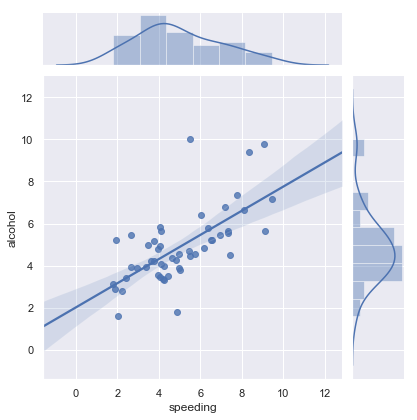

In [5]:
crashes = sns.load_dataset("car_crashes");
sns.jointplot("speeding", "alcohol", crashes, kind='reg');

## Alternativa con `matplotlib`:

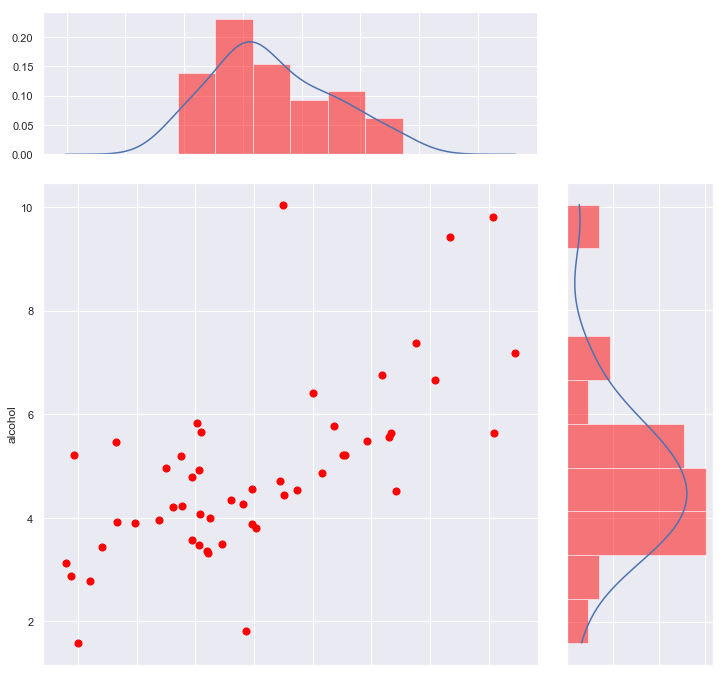

In [13]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

fig = plt.figure(1, figsize=[12, 12])
ax1 = plt.subplot2grid((4, 4), (1, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((4, 4), (0, 0), colspan=3)
ax3 = plt.subplot2grid((4, 4), (1, 3), rowspan=3)

crashes.plot.scatter(x='speeding', y='alcohol', ax=ax1, color='red', s=50)
crashes.plot.kde(y='speeding', ax=ax2, sharex=ax1, legend=None)
crashes.plot.hist(y='speeding', bins=6, ax=ax2, sharex=ax1, normed=True, legend=None, alpha=.5, color='red')


ax2.set_ylabel('')
ax2.set_yticks=[]
ax2.set_yticklabels=[]

# No está soportado directamente el rotado en kde
kde_speeding = gaussian_kde(crashes.alcohol)
y = np.linspace(np.amin(crashes.alcohol), np.amax(crashes.alcohol), 100)
ax3.plot(kde_speeding(y), y)
crashes.plot.hist(y='alcohol', ax=ax3, sharey=ax1, normed=True, legend=None, orientation='horizontal', alpha=.5, color='red');

# ? plt.figure